In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Users\Noor\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [85]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(20, activation=tf.nn.tanh ),#128
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [86]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2056 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2063 - acc: 0.9256
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2055 - acc: 0.9253
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2043 - acc: 0.9263
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2045 - acc: 0.9250


In [115]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.861


In [116]:
predictions = model.predict(test_images)

In [117]:
np.argmax(predictions[0])

9

In [118]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [119]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [120]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.96266298e-10 1.08933065e-13 5.49829793e-10 8.51044657e-09
  1.93093919e-09 9.45371285e-05 1.69137071e-09 1.14172557e-03
  2.27814894e-07 9.98763561e-01]]


In [121]:
np.argmax(predictions_single[0])

9

In [122]:
from sklearn.metrics import classification_report
val_preds = np.argmax(predictions, axis=-1)
# y_pred = model.predict(x_test)
print(classification_report(test_labels, val_preds))
from sklearn.metrics import precision_recall_fscore_support
Precision, Recall, F1_Score, Average =precision_recall_fscore_support(test_labels, val_preds , average='macro')
print(F1_Score)

             precision    recall  f1-score   support

          0       0.81      0.82      0.82      1000
          1       0.97      0.95      0.96      1000
          2       0.77      0.77      0.77      1000
          3       0.87      0.85      0.86      1000
          4       0.76      0.83      0.79      1000
          5       0.96      0.92      0.94      1000
          6       0.67      0.62      0.65      1000
          7       0.92      0.95      0.94      1000
          8       0.94      0.95      0.94      1000
          9       0.94      0.95      0.94      1000

avg / total       0.86      0.86      0.86     10000

0.86060876780122


In [16]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

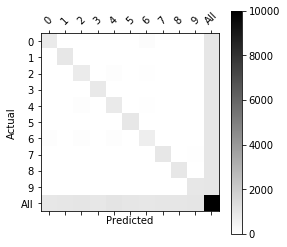

In [17]:
import pandas as pd 
df_confusion = pd.crosstab(test_labels, val_preds)
df_confusion = pd.crosstab(test_labels, val_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
plot_confusion_matrix(df_confusion)